<a href="https://colab.research.google.com/github/Ruchiiika/Cloud/blob/main/ML1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
from sklearn.linear_model import LinearRegression

In [5]:
from sklearn.metrics import mean_squared_error, r2_score

In [6]:
import matplotlib.pyplot as plt

In [7]:
import seaborn as sns

In [10]:
df=pd.read_csv('https://raw.githubusercontent.com/sahilraut05/SPPU-BE-COMP-Laboratory-Practice-III-Practicals/refs/heads/main/GroupB-ML/ML_1_Uber_Price_Prediction/uber.csv')

In [11]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [12]:
df.tail()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
199995,42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1
199999,11951496,2010-05-15 04:08:00.00000076,14.1,2010-05-15 04:08:00 UTC,-73.984395,40.720077,-73.985508,40.768793,1


In [13]:
df.dtypes

,0
Unnamed: 0,int64
key,object
fare_amount,float64
pickup_datetime,object
pickup_longitude,float64
pickup_latitude,float64
dropoff_longitude,float64
dropoff_latitude,float64
passenger_count,int64


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [15]:
df.isnull().sum()

,0
Unnamed: 0,0
key,0
fare_amount,0
pickup_datetime,0
pickup_longitude,0
pickup_latitude,0
dropoff_longitude,1
dropoff_latitude,1
passenger_count,0


In [16]:
df.dropna(inplace=True)

In [17]:
df.isnull().sum()

,0
Unnamed: 0,0
key,0
fare_amount,0
pickup_datetime,0
pickup_longitude,0
pickup_latitude,0
dropoff_longitude,0
dropoff_latitude,0
passenger_count,0


In [18]:
df["pickup_datetime"]=pd.to_datetime(df["pickup_datetime"])

In [19]:
df['hour']=df['pickup_datetime'].dt.hour

In [20]:
df['day']=df['pickup_datetime'].dt.dayofweek

In [21]:
df['month']=df['pickup_datetime'].dt.month

In [22]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,19,3,5
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,20,4,7
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,21,0,8
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,8,4,6
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,17,3,8


In [39]:
features=["pickup_latitude","pickup_longitude","dropoff_latitude","dropoff_longitude","passenger_count","hour","day","month"]

In [40]:
df=df[(df['fare_amount']>0)&(df['fare_amount']<200)]

<Axes: xlabel='passenger_count'>

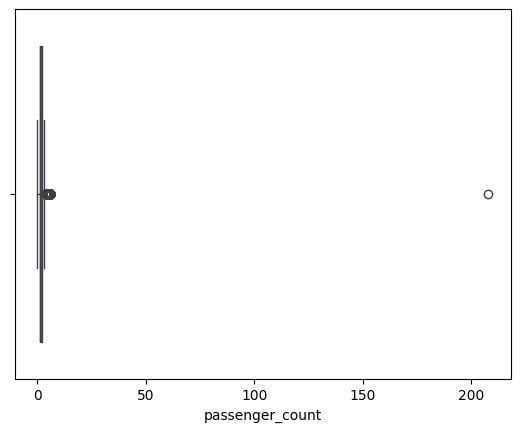

In [41]:
sns.boxplot(x=df['passenger_count'])

<Axes: xlabel='fare_amount'>

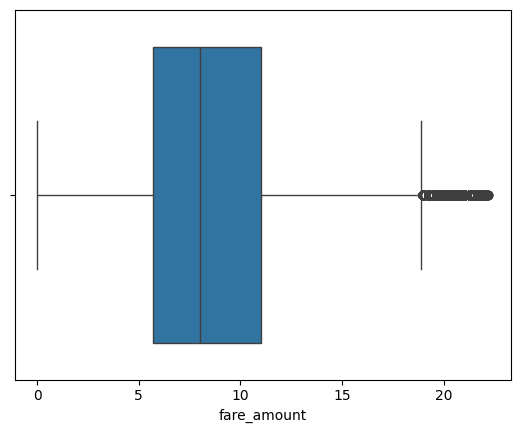

In [42]:
sns.boxplot(x=df['fare_amount'])

In [43]:
Q1=df['fare_amount'].quantile(0.25)
Q3=df['fare_amount'].quantile(0.75)
IQR=Q3-Q1
df=df[(df['fare_amount']>Q1-(1.5*IQR)) & (df['fare_amount']<Q3+(1.5*IQR))]
corr=df[['passenger_count','fare_amount','pickup_latitude','pickup_longitude']].corr()

In [44]:
corr

,passenger_count,fare_amount,pickup_latitude,pickup_longitude
passenger_count,1.000000,0.015577,-0.001420,-0.001021
fare_amount,0.015577,1.000000,0.004532,-0.001427
pickup_latitude,-0.001420,0.004532,1.000000,-0.808050
pickup_longitude,-0.001021,-0.001427,-0.808050,1.000000


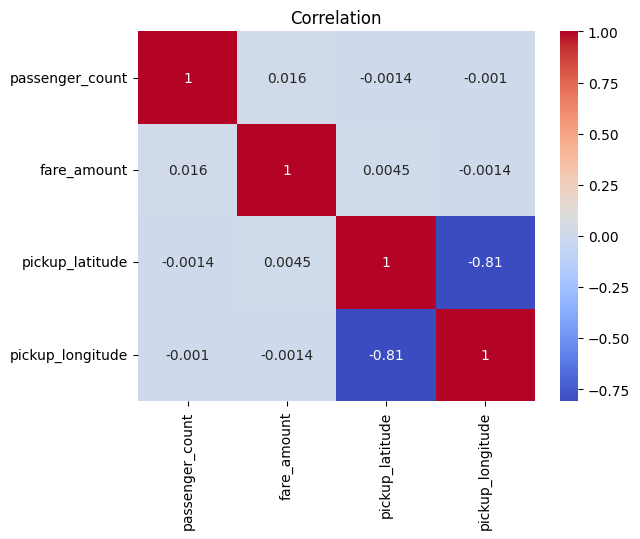

In [45]:
sns.heatmap(corr,annot=True,cmap='coolwarm')
plt.title('Correlation')
plt.show()

In [46]:
def haversine(lat1,lon1,lat2,lon2):
  R=6371
  lat1,lon1,lat2,lon2=np.radians([lat1,lon1,lat2,lon2])
  dlat=lat2-lat1
  dlon=lon2-lon1
  a=np.sin(dlat/2)**2+np.cos(lat1)*np.cos(lat2)*np.sin(dlon/2)**2
  return R*2*np.arcsin(np.sqrt(a))
df["distance"]=haversine(df["pickup_latitude"],df["pickup_longitude"],df["dropoff_latitude"],df["dropoff_longitude"])

In [47]:
df=df[df['fare_amount']<100]
df=df[df['distance']<100]
df['distance'].head()


,distance
0,1.683323
1,2.457590
2,5.036377
3,1.661683
4,4.475450


In [48]:
df['distance'].isnull()

,distance
0,False
1,False
2,False
3,False
4,False
...,...
199994,False
199995,False
199996,False
199998,False


In [50]:
features=["passenger_count","hour","distance","month"]
x=df[features]
y=df['fare_amount']

In [51]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
model=LinearRegression()
model.fit(x_train,y_train)
LinearRegression()

LinearRegression()

In [52]:
y_pred=model.predict(x_test)
print("R2_Score",r2_score(y_test,y_pred))
print("RMSE",mean_squared_error(y_test,y_pred))

R2_Score 0.5183377212149849
RMSE 6.389105999886345


In [53]:
from sklearn.ensemble import RandomForestRegressor

In [54]:
rf=RandomForestRegressor(n_estimators=100,random_state=42)
rf.fit(x_train,y_train)
ypred=rf.predict(x_test)
mse=mean_squared_error(y_test,ypred)
rmse=np.sqrt(mse)
r2=r2_score(y_test,ypred)
print("MSE",mse)
print("RMSE",rmse)
print("R2",r2)

MSE 5.121873023192519
RMSE 2.2631555455143864
R2 0.6138719514056759
